In [1]:

import pyspark
from pyspark.sql import SparkSession

spark = SparkSession.builder.appName("TestSpark").getOrCreate()



Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
25/02/13 13:47:57 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


In [5]:
# Read the CSV file into a DataFrame
df = spark.read.option("header", True).csv("data/grid_data.csv")

# Show the first few rows
df.show()

+--------+------+--------+--------+----------+-------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+-------------------+-------------------+-------------------+-------------------+------------------+------------------+------------------+-----------------+---------+------------------+-------------------+----------------+----------------+
|OBJECTID|County|TAZ_Zone|County_1|TAZ_Zone_1|            Y22_GNA|           Y23_GNA|           Y24_GNA|           Y25_GNA| F0h_total_EV_load| F1h_total_EV_load| F2h_total_EV_load| F3h_total_EV_load| F4h_total_EV_load| F5h_total_EV_load| F6h_total_EV_load| F7h_total_EV_load| F8h_total_EV_load| F9h_total_EV_load|F1

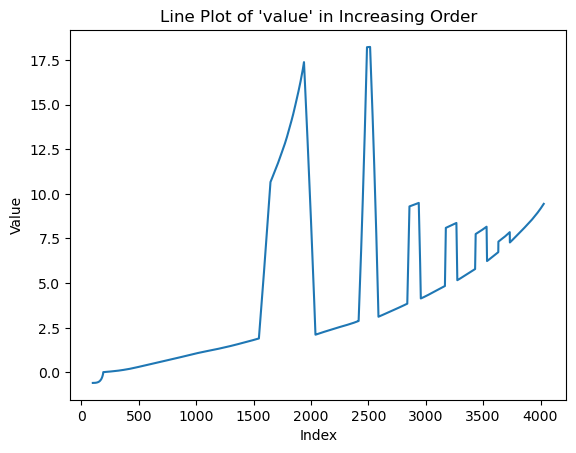

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

columns_to_plot = ['Y22_GNA']

df_plot = df.select(columns_to_plot)

# # Select a column (e.g., 'value') and collect data
# values = df_plot.select("Y22_GNA").rdd.flatMap(lambda x: x).collect()

# Convert to Pandas DataFrame (assuming 'df' is your PySpark DataFrame)
df_pandas = df.select("Y22_GNA").toPandas()

df_pandas_sorted = df_pandas.sort_values(by="Y22_GNA").rolling(window=100).mean()

# # Create a line plot
sns.lineplot(x=range(len(df_pandas_sorted)), y=df_pandas_sorted["Y22_GNA"])

# Display the plot
plt.title("Line Plot of 'value' in Increasing Order")
plt.xlabel("Index")
plt.ylabel("Value")
plt.show()

In [31]:
# Read the CSV file into a DataFrame
df_caltrans = spark.read.option("header", True).csv("data/caltrans_2021_01.csv")

# Show the first few rows
df_caltrans.show()

df_caltrans.count()

+----+-----+--------------+-------------------+----------------+---------------------+------------+-----------------+-----------+----------------+--------+----------------+------------------+---------+------------------+--------------------+-----------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------------+--------------+--------------+--------------+---------------+----------------+----------------+--------------+--------+---------+--------+--------+---------+---------+-----------+-----------+-----------+-----------+--------+---------+---------+---------+--------+------------+-------------+-------------+--------------+-------------+-----------+-------------+-----------+-----------+--------------+-----------+-----------+-----------+-----------+--------------+-----------+-----------+--------------+--------------+-----------+-----------+--

9637103

In [33]:
df_NHTS = spark.read.option("header", True).csv("data/vis-export.csv")

# Show the first few rows
df_NHTS.show()

df_NHTS.count()

+----+-----+--------------+--------------------+-------------------+---------------------+-----------+
|year|month|origin_zone_id|    origin_zone_name|destination_zone_id|destination_zone_name|total_trips|
+----+-----+--------------+--------------------+-------------------+---------------------+-----------+
|2022|    1|      31080_CA|Los Angeles-Long ...|           31080_CA| Los Angeles-Long ...| 1043567847|
|2022|    1|      40140_CA|Riverside-San Ber...|           40140_CA| Riverside-San Ber...|  394655277|
|2022|    1|      41860_CA|San Francisco-Oak...|           41860_CA| San Francisco-Oak...|  341252970|
|2022|    1|      41740_CA|San Diego-Carlsba...|           41740_CA| San Diego-Carlsba...|  292577966|
|2022|    1|      40900_CA|Sacramento--Rosev...|           40900_CA| Sacramento--Rosev...|  203068980|
|2022|    1|      41940_CA|San Jose-Sunnyval...|           41940_CA| San Jose-Sunnyval...|  147919062|
|2022|    1|      23420_CA|          Fresno, CA|           23420_CA|     

17490

25/02/13 03:43:00 WARN HeartbeatReceiver: Removing executor driver with no recent heartbeats: 467022 ms exceeds timeout 120000 ms
25/02/13 03:43:00 WARN SparkContext: Killing executors is not supported by current scheduler.
25/02/13 03:43:00 ERROR Inbox: Ignoring error
org.apache.spark.SparkException: Exception thrown in awaitResult: 
	at org.apache.spark.util.SparkThreadUtils$.awaitResult(SparkThreadUtils.scala:56)
	at org.apache.spark.util.ThreadUtils$.awaitResult(ThreadUtils.scala:310)
	at org.apache.spark.rpc.RpcTimeout.awaitResult(RpcTimeout.scala:75)
	at org.apache.spark.rpc.RpcEnv.setupEndpointRefByURI(RpcEnv.scala:102)
	at org.apache.spark.rpc.RpcEnv.setupEndpointRef(RpcEnv.scala:110)
	at org.apache.spark.util.RpcUtils$.makeDriverRef(RpcUtils.scala:36)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.driverEndpoint$lzycompute(BlockManagerMasterEndpoint.scala:124)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.org$apache$spark$storage$BlockManagerMasterEndpoint$$

In [3]:
df_trips = spark.read.option("header", True).csv("data/gps_trips.csv")

# Show the first few rows
df_trips.show()

+-------+-----+---------+------------+----------------+-------------------+-------------------+------------+--------------+-------------+-------------+-----------+--------+------------+------------+------------+----------------+-------+------------+-----------+------------+------+--------+---------------+--------------------+
| sampno|perno|gpstripid|gpstravdayid|gpstravdaytripid|         start_time|           end_time|duration_min|distance_miles|avg_speed_mph|max_speed_mph|travel_mode|nbstages|travmodelist|numuniqmodes|uniqmodelist|distfromlastdest|gaptime|tripareatype|workrelated|no_transport|onsite|looptrip|origin_loc_type|destination_loc_type|
+-------+-----+---------+------------+----------------+-------------------+-------------------+------------+--------------+-------------+-------------+-----------+--------+------------+------------+------------+----------------+-------+------------+-----------+------------+------+--------+---------------+--------------------+
|1121310|    2| 

In [6]:
df_trips_car = spark.read.option("header", True).csv("data/obd_gpstrips.csv")

# Show the first few rows
df_trips_car.show()

+-------+-----+---------+------------+----------------+-------------------+-------------------+------------+--------------+-------------+-------------+----------+----------+---------------+---------------+------------------------+-------+------------+-----------+------------+------+--------+---------------+--------------------+--------+
| sampno|vehno|gpstripid|gpstravdayid|gpstravdaytripid|         start_time|           end_time|duration_min|distance_miles|avg_speed_mph|max_speed_mph|origin_lon|origin_lat|destination_lon|destination_lat|destination_distfromlast|gaptime|tripareatype|workrelated|nontransport|onsite|looptrip|origin_loc_type|destination_loc_type|    geom|
+-------+-----+---------+------------+----------------+-------------------+-------------------+------------+--------------+-------------+-------------+----------+----------+---------------+---------------+------------------------+-------+------------+-----------+------------+------+--------+---------------+--------------

In [7]:
df_trips_car = spark.read.option("header", True).csv("data/v_gpstrips.csv")

# Show the first few rows
df_trips_car.show()

+-------+-----+---------+------------+----------------+-------------------+-------------------+------------+--------------+-------------+-------------+----------+----------+---------------+---------------+------------------------+-------+------------+-----------+------------+------+--------+---------------+--------------------+--------+
| sampno|vehno|gpstripid|gpstravdayid|gpstravdaytripid|         start_time|           end_time|duration_min|distance_miles|avg_speed_mph|max_speed_mph|origin_lon|origin_lat|destination_lon|destination_lat|destination_distfromlast|gaptime|tripareatype|workrelated|nontransport|onsite|looptrip|origin_loc_type|destination_loc_type|    geom|
+-------+-----+---------+------------+----------------+-------------------+-------------------+------------+--------------+-------------+-------------+----------+----------+---------------+---------------+------------------------+-------+------------+-----------+------------+------+--------+---------------+--------------

25/02/13 23:55:24 WARN HeartbeatReceiver: Removing executor driver with no recent heartbeats: 7188741 ms exceeds timeout 120000 ms
25/02/13 23:55:24 WARN SparkContext: Killing executors is not supported by current scheduler.
25/02/13 23:55:30 ERROR Inbox: Ignoring error
org.apache.spark.SparkException: Exception thrown in awaitResult: 
	at org.apache.spark.util.SparkThreadUtils$.awaitResult(SparkThreadUtils.scala:56)
	at org.apache.spark.util.ThreadUtils$.awaitResult(ThreadUtils.scala:310)
	at org.apache.spark.rpc.RpcTimeout.awaitResult(RpcTimeout.scala:75)
	at org.apache.spark.rpc.RpcEnv.setupEndpointRefByURI(RpcEnv.scala:102)
	at org.apache.spark.rpc.RpcEnv.setupEndpointRef(RpcEnv.scala:110)
	at org.apache.spark.util.RpcUtils$.makeDriverRef(RpcUtils.scala:36)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.driverEndpoint$lzycompute(BlockManagerMasterEndpoint.scala:124)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.org$apache$spark$storage$BlockManagerMasterEndpoint$